# Overview

Much of our time on numerical problems thus far has focused on making nice plots.  This class provides good opportunity for that kind of thing and my hope was that the plots would help you understand the physics deeper.  This week we will revisit a topic that you should have seen in a previous class: Euler's Method!  As you might guess, we will apply Euler's method in the context of electric fields and point charges.

## A simple example.

Consider the electric potential generated by a dipole with $q = 3e$.  The positive charge is located at $r_+ = (1,1)$ m and the negative charge is located at $r_- = (-1,-1)$ m.  A contour plot of that potential is shown below:(nearly identical to last week's problem.)


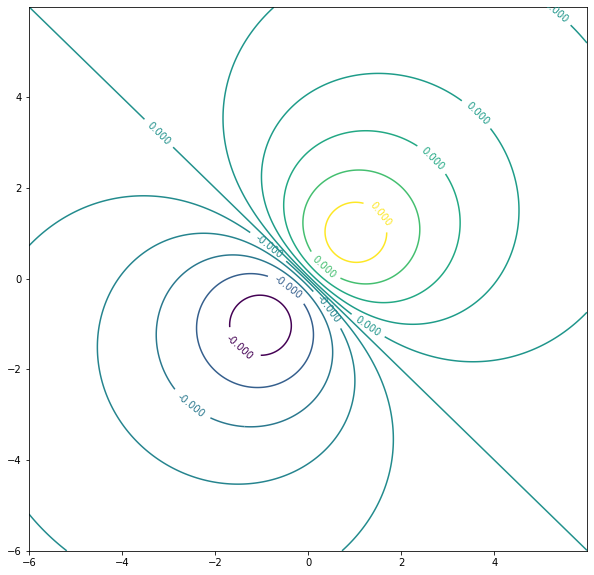

In [16]:
from numpy import arange,meshgrid,sqrt,array
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

x = arange(-6,6,.01)
y = arange(-6,6,.01)
X,Y = meshgrid(x,y)

k = 8.99e9
e = -1.602e-19
q = abs(3 * e)

rChargeOne = array([1,1])
rChargeTwo = array([-1,-1])


V = k * q/sqrt((X-rChargeOne[0])**2 + (Y-rChargeOne[1])**2) -  k * q/sqrt((X-rChargeTwo[0])**2 + (Y-rChargeTwo[1])**2)
fig,ax = pyplot.subplots(figsize = (10,10))
contourLocations = array([-500,-200,-100,-50,-20,0,20,50,100,200,500]) *1e-11
CP = ax.contour(X,Y,V,contourLocations)  
ax.clabel(CP, inline=True, fontsize=10)
pyplot.show()

Now imagine fixing these charges in place and introducing an electron that can move under the influence of the dipole's electric field.  The initial position and velocity of the electron is:

$$x_i = [5.0,-5.0] \text{ m}$$
$$v_i = [-8.0,3.0] \text{ m/s}$$ 

From that information, let's see if we can calculate the trajectory of the electron:

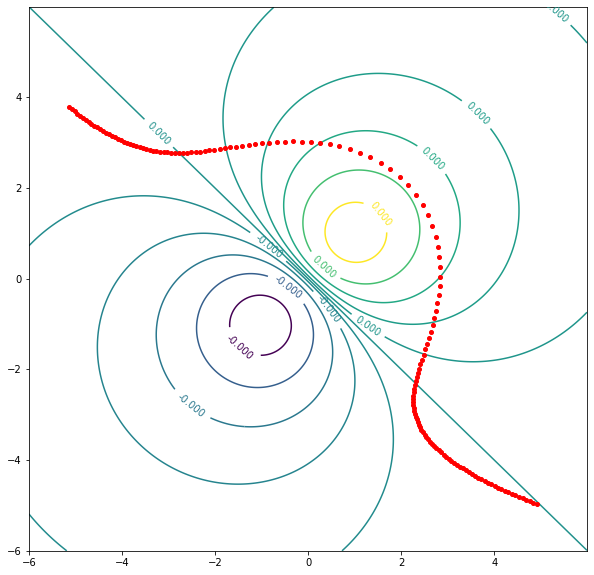

In [9]:
from numpy import array
from numpy.linalg import norm
from matplotlib import pyplot

rchargeOne = array([1,1])
rchargeTwo = array([-1,-1])
m = 9.109e-31


r = array([5,-5])
v = array([-8,3])
dt = 0.01
t = 0
fig,ax = pyplot.subplots(figsize = (10,10))

while t < 1.5:
    deltaROne = r - rChargeOne # Vector that points from charge 1 to the electron.
    deltaRTwo = r - rChargeTwo
    a = k * q * e/m * array([1 /norm(deltaROne)**3 * deltaROne[0] - 1 /norm(deltaRTwo)**3 * deltaRTwo[0] , 1 /norm(deltaROne)**3 * deltaROne[1] - 1 /norm(deltaRTwo)**3 * deltaRTwo[1] ])
    v = v + a * dt
    r = r + v * dt
    t = t + dt
    ax.plot(r[0],r[1],'r.',ms=8)
    
    
CP = ax.contour(X,Y,V,contourLocations)  
ax.clabel(CP, inline=True, fontsize=10)
pyplot.show()

Complete the following:


1. Try to digest every line of code.  Ask questions where needed.  Add comments to help you remember what each line does.
2. Experiment with the code and verify that the results make sense.  Here are some ideas:
     1. Let the particle in motion be a positron (same mass as an electron, but positively charged.)
     2. Increase the mass of the particle (not too much).  Does the trajectory make sense?
     3. Play with the initial conditions and verify that the resulting trajectory makes good sense.
     
3. Now modify the code above to add a third stationary point charge.  The third point charge should have $q = + 1.5 e$ and should be located at $r = (-3,3)$ m.  (Note: You'll need to modify the contour plot too.)  Your results should look like this: ($dt = 0.005$)

![](https://lancejnelson.github.io/PH220/course_docs/numericalHW/Eulers.png)
